# 时间序列分析中的平稳性
在这个实验中，我们将探讨时间序列数据的平稳性以及如何进行检验。

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

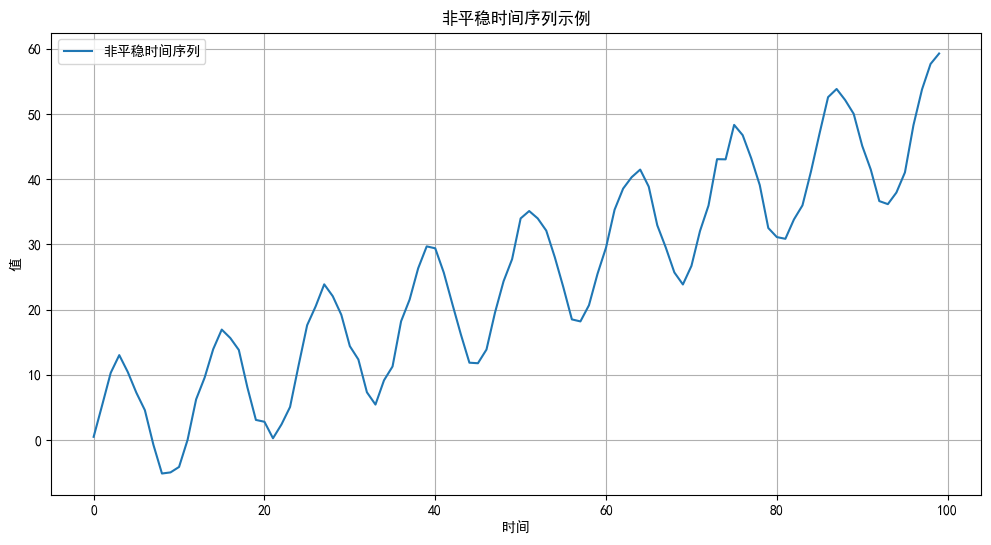

In [32]:
# 设置随机种子以保证结果可重现
np.random.seed(42)

# 生成非平稳时间序列（带有趋势）
n = 100
time = np.arange(n)
trend = 0.5 * time  # 线性趋势
seasonal = 10 * np.sin(2 * np.pi * time / 12)  # 周期性成分
noise = np.random.normal(size=n)  # 随机噪声

# 生成最终时间序列
non_stationary_series = trend + seasonal + noise

# 将数据转化为DataFrame
data = pd.DataFrame({'Time': time, 'Value': non_stationary_series})

# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Value'], label='非平稳时间序列')
plt.title('非平稳时间序列示例')
plt.xlabel('时间')
plt.ylabel('值')
plt.legend()
plt.grid()
plt.show()


In [33]:

from statsmodels.tsa.stattools import adfuller

# 进行ADF检验
adf_result = adfuller(data['Value'])

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value}')


ADF Statistic: 0.5035349797382939
p-value: 0.9849801440636601
Critical Values:
    1%: -3.506944401824286
    5%: -2.894989819214876
    10%: -2.584614550619835


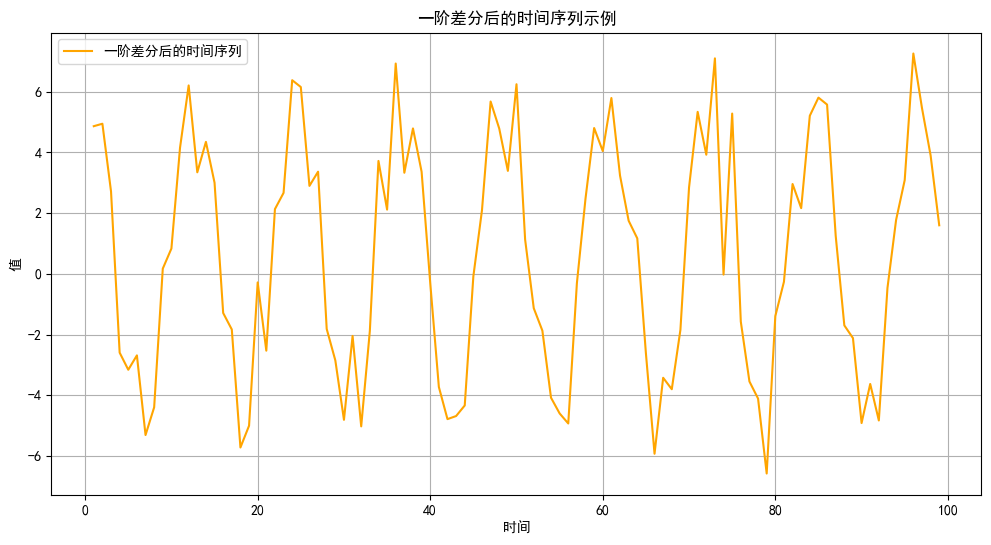

In [34]:

# 一阶差分以去除趋势
data['Differenced'] = data['Value'].diff().dropna()

# 绘制差分后的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['Time'][1:], data['Differenced'][1:], label='一阶差分后的时间序列', color='orange')
plt.title('一阶差分后的时间序列示例')
plt.xlabel('时间')
plt.ylabel('值')
plt.legend()
plt.grid()
plt.show()


In [35]:

# 进行ADF检验以检查差分后的序列
adf_result_diff = adfuller(data['Differenced'].dropna())

print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])
print('Critical Values (Differenced):')
for key, value in adf_result_diff[4].items():
    print(f'    {key}: {value}')


ADF Statistic (Differenced): -6.791643767699289
p-value (Differenced): 2.356447024999174e-09
Critical Values (Differenced):
    1%: -3.5087828609430614
    5%: -2.895783561573195
    10%: -2.5850381719848565
